In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header= None)

In [21]:
df = df.rename(columns={0:'dlugosc_dzialki', 2:'dlugosc_platka', 4:'label'})

label_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
    }
df['label'] = df['label'].map(label_mapping)

X = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4].values

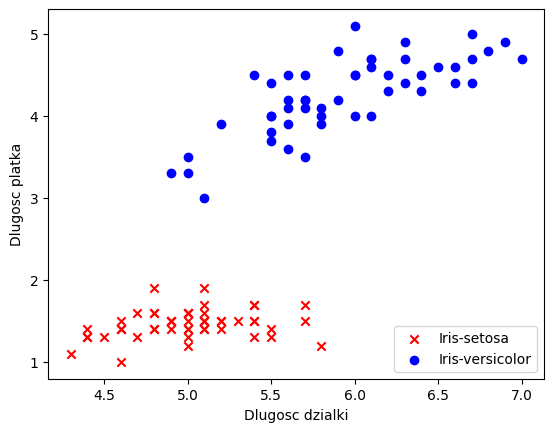

In [22]:
plt.scatter(X[0:50,0], X[0:50,1], marker='x', color='red', label = 'Iris-setosa')
plt.scatter(X[50:100,0], X[50:100,1], marker='o', color='blue', label = 'Iris-versicolor')
plt.xlabel('Dlugosc dzialki')
plt.ylabel('Dlugosc platka')
plt.legend(loc = 'lower right')
plt.show()

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
y = np.where(y == 1, 1, -1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [25]:
class Perceptron:
    def __init__(self, eta = 0, n_epoch = 0, random_state = 0) -> None:
        self.eta = eta
        self.n_epoch = n_epoch
        self.seed = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.seed)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_epoch):
            errors = 0
            for xi, yi in zip(X,y):
                delta = self.eta*(yi - self.predict(xi))
                self.w_[1:] += delta * xi
                self.w_[0] += delta
                errors += int(delta != 0.0)
            self.errors_.append(errors)
        return self

    
    def net_input(self,X):
        return self.w_[0] + np.dot(X, self.w_[1:])

    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


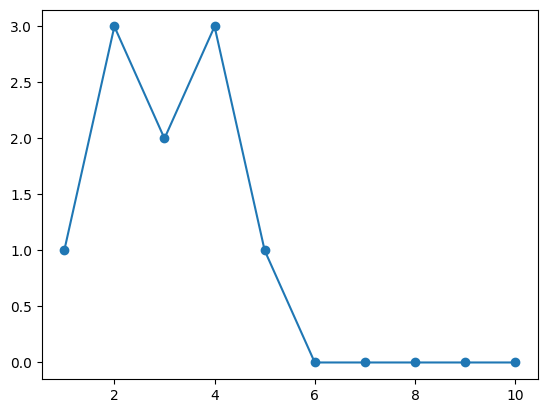

In [26]:
ppn = Perceptron(eta=0.001, n_epoch=10, random_state= 1)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_) +1), ppn.errors_, marker = 'o')
plt.show()

In [29]:
class AdalinePerceptron:
    def __init__(self, eta = 0, n_epoch = 0, random_state = 0) -> None:
        self.eta = eta
        self.n_epoch = n_epoch
        self.seed = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.seed)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        for _ in range(self.n_epoch):
            net_output = self.activation(self.net_input(X))
            errors = (y-net_output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = np.pow(errors,2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def activation(self,X):
        return X
    def net_input(self,X):
        return self.w_[0] + np.dot(X, self.w_[1:])

    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

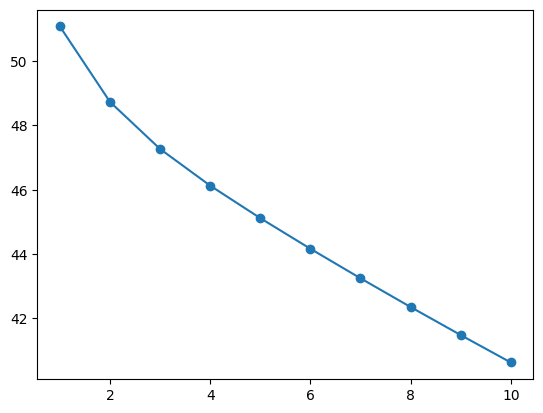

In [32]:
ppn = AdalinePerceptron(eta=0.0001, n_epoch=10, random_state= 1)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.cost_) +1), ppn.cost_, marker = 'o')
plt.show()

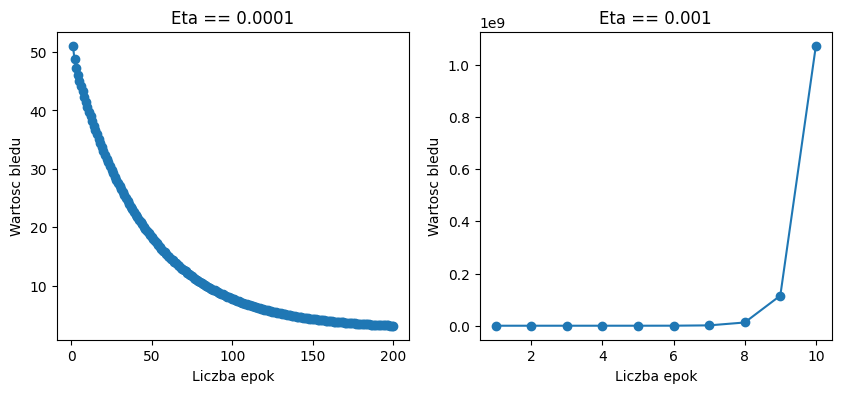

In [43]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (10,4))

ppn = AdalinePerceptron(eta=0.0001, n_epoch=200, random_state= 1)
ppn = ppn.fit(X,y)

ax[0].plot(range(1, len(ppn.cost_) +1), ppn.cost_, marker = 'o')
ax[0].set_xlabel('Liczba epok')
ax[0].set_ylabel('Wartosc bledu')
ax[0].set_title(f'Eta == {ppn.eta}')

ppn1 = AdalinePerceptron(eta=0.001, n_epoch=10, random_state= 1)
ppn1 = ppn1.fit(X,y)

ax[1].plot(range(1, len(ppn1.cost_) +1), ppn1.cost_, marker = 'o')
ax[1].set_xlabel('Liczba epok')
ax[1].set_ylabel('Wartosc bledu')
ax[1].set_title(f'Eta == {ppn1.eta}')

plt.show()
